In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits

%matplotlib inline

In [2]:
bad_pixels = pd.read_csv('./mask.txt', sep='\s+', names=['x', 'y'])

In [3]:
image = fits.open('./J083933.4-014044.4-HSC-G-pdr3_wide.fits')[1].data

In [4]:
bad_pixels

,x,y
0,34,62
1,35,55
2,35,56
3,35,57
4,35,58
...,...,...
586,60,82
587,60,83
588,60,84
589,60,85


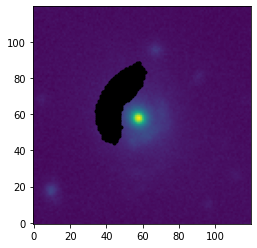

In [5]:
plt.imshow(image, origin='lower')
plt.plot(bad_pixels['x'], bad_pixels['y'], 'k.')

In [6]:
bad_pixels=list(zip(bad_pixels['x'], bad_pixels['y']))

In [7]:
mask = np.zeros(shape=(120, 120))
for i in range(0, len(mask)):
    for j in range(0, len(mask[i])):
        if (j, i) in bad_pixels:
            mask[i][j] = 1

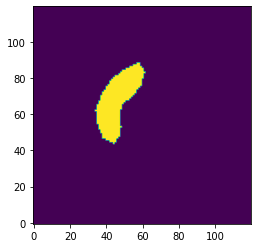

In [8]:
plt.imshow(mask, origin='lower')

In [11]:
hdu = fits.PrimaryHDU(mask)
hdu.writeto('./mask.fits', overwrite=True)